In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [16]:
import math
N = 10000
d =10
ads_selected=[]
numbers_of_selections=[0]*d
sum_of_rewards=[0]*d
total_reward=0
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if (numbers_of_selections[i] > 0):
            average= sum_of_rewards[i]/numbers_of_selections[i]
            delta_i= math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound=average+delta_i
        else:
            upper_bound= 1e400
        if upper_bound> max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    numbers_of_selections[ad]=numbers_of_selections[ad]+1
    reward=data.values[n,ad]
    sum_of_rewards[ad]=sum_of_rewards[ad]+reward   
    total_reward=total_reward+reward
    
        
        

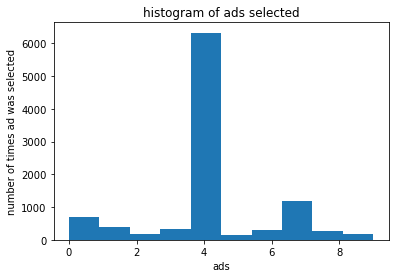

In [17]:
plt.hist(x=ads_selected)
plt.title('histogram of ads selected')
plt.xlabel('ads')
plt.ylabel('number of times ad was selected')
plt.show()